### Importación de datos



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
from urllib.request import urlopen
import csv

urls=[url1,url2,url3,url4]

tiendas=[tienda1,tienda2,tienda3,tienda4]

#se crea un array para alamacenar los precios de c/tienda
precios_tiendas=[]

# Se crea un for para guardar los precios de cada tienda
for i in range(len(tiendas)):
  precios_total = tiendas[i]['Precio'].sum()
  precios_tiendas.append(float(precios_total))

#Se crea orto for para totaliar los precios por tienda
for i in range(len(precios_tiendas)):
    print(f'La facturación de la tienda {i+1} es: ${precios_tiendas[i]:.2f}')

#Facturacion total
total_tiendas = sum(precios_tiendas)

print(f'\nLa facturacion total de las tiendas es: ${total_tiendas:.2f}')

La facturación de la tienda 1 es: $1150880400.00
La facturación de la tienda 2 es: $1116343500.00
La facturación de la tienda 3 es: $1098019600.00
La facturación de la tienda 4 es: $1038375700.00

La facturacion total de las tiendas es: $4403619200.00


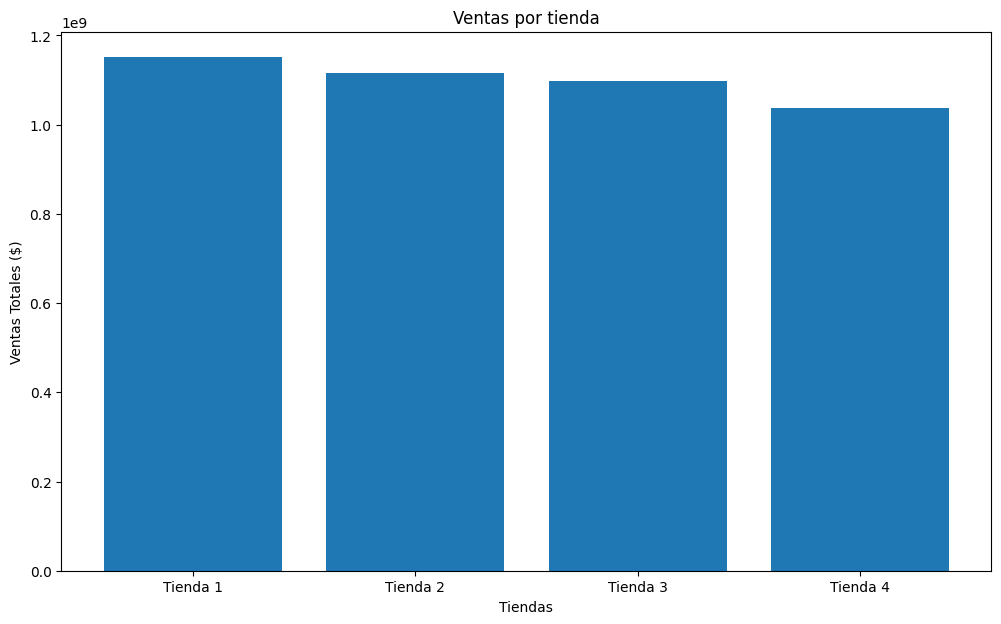

In [3]:
from logging import info
import pandas as pd
import matplotlib.pyplot as plt

texto_tiendas=[f'Tienda {i+1}' for i in range(len(precios_tiendas))]

plt.figure(figsize=(12, 7))
plt.bar(texto_tiendas,precios_tiendas)

plt.title('Ventas por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ventas Totales ($)')


plt.show()

# 2. Ventas por categoría

In [4]:
tiendas=[tienda1,tienda2,tienda3,tienda4]

#Se crea un diccionarios para almacener las categorias y ventas de c/tienda
ventas_por_categoria = {}
info_grafico = pd.DataFrame()

for i, tienda in enumerate(tiendas):
  nombre=f'Tienda{i+1}'
  conteo=tienda['Categoría del Producto'].value_counts()
  dinero=tienda.groupby('Categoría del Producto')['Precio'].sum()
  info_grafico[nombre] = dinero
  ventas_por_categoria[nombre]={
      'Cantidad': conteo, 'Dinero': dinero
  }


In [5]:
for i, tienda in enumerate(tiendas):
  nombre=f'Tienda{i+1}'
  print(nombre)
  print(f'\n {ventas_por_categoria[nombre]["Dinero"]}')

Tienda1

 Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64
Tienda2

 Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64
Tienda3

 Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicales      77380900.0
Juguetes                

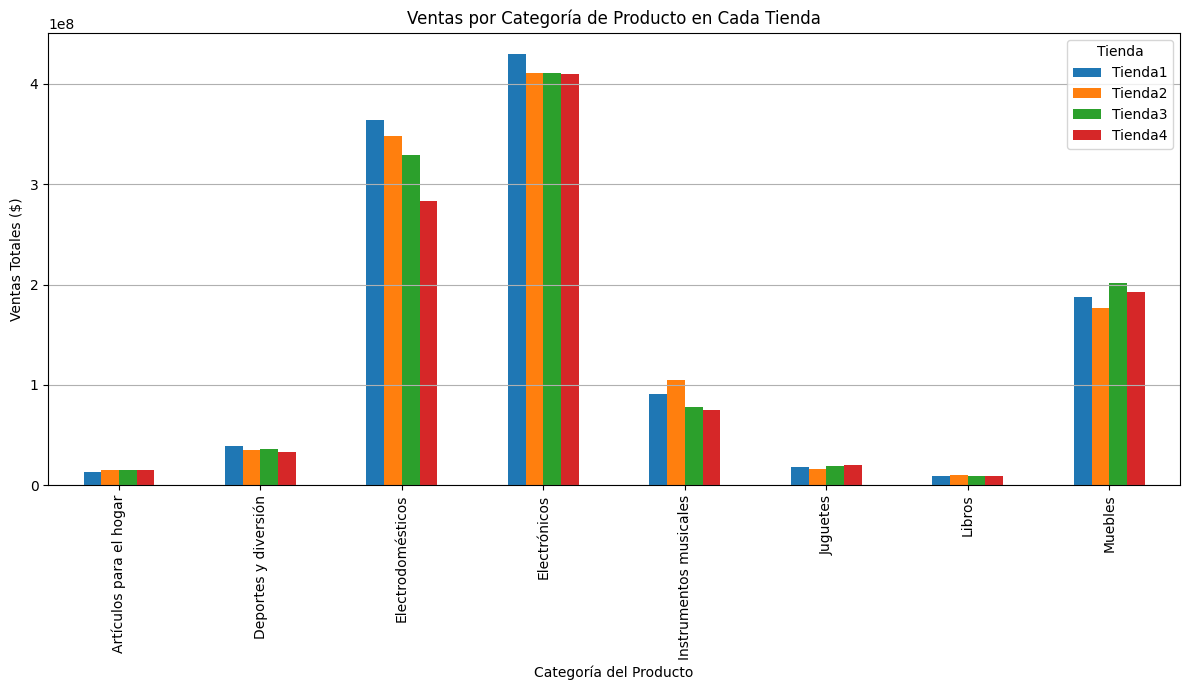

In [6]:
from logging import info
import pandas as pd
import matplotlib.pyplot as plt

info_grafico.index.name = 'Categoría del Producto'
info_grafico = info_grafico.fillna(0)

info_grafico.plot(kind='bar', figsize=(12, 7))
plt.title('Ventas por Categoría de Producto en Cada Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.legend(title='Tienda')
plt.tight_layout()
plt.grid(axis='y')

plt.show()

# 3. Calificación promedio de la tienda


In [7]:
promedios=[]
for i in range(len(tiendas)):
  Calificacin_total = tiendas[i]['Calificación'].sum()
  ttal=len(tiendas[i]['Calificación'])
  promedios.append(float(Calificacin_total/ttal))


  print(f'La calificacin de la tienda {i+1} es: {promedios[i]:.2f}')

La calificacin de la tienda 1 es: 3.98
La calificacin de la tienda 2 es: 4.04
La calificacin de la tienda 3 es: 4.05
La calificacin de la tienda 4 es: 4.00


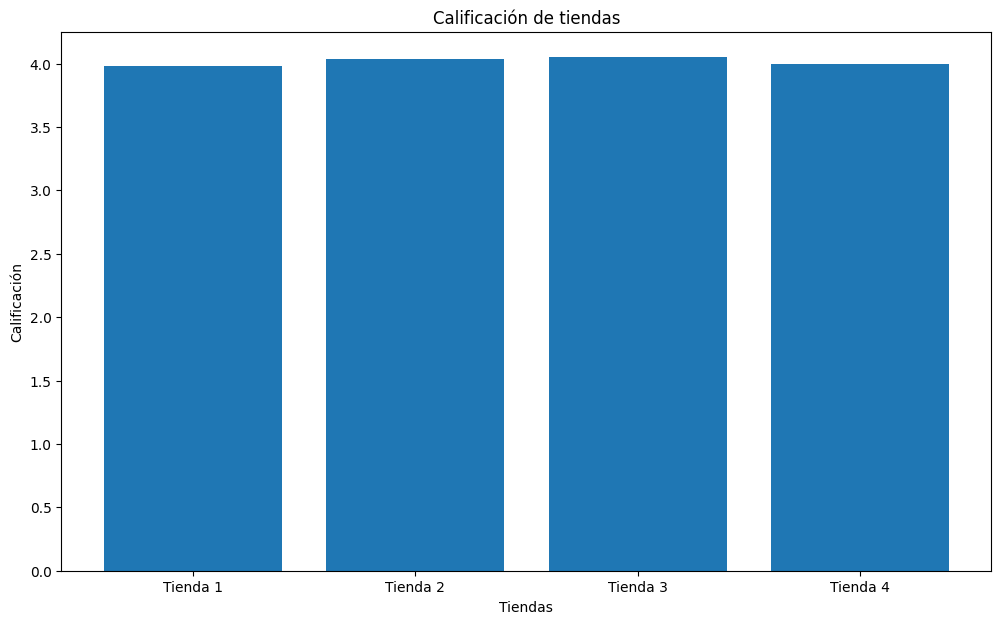

In [8]:
plt.figure(figsize=(12, 7))
plt.bar(texto_tiendas,promedios)

plt.title('Calificación de tiendas')
plt.xlabel('Tiendas')
plt.ylabel('Calificación')


plt.show()

# 4. Productos más y menos vendidos

In [9]:
ventas_por_producto = {}
top3mas_vendidos = {}
top3menos_vendidos = {}
tiendas=[tienda1,tienda2,tienda3,tienda4]
info_top3arriba = pd.DataFrame()
info_top3abajo = pd.DataFrame()

for i, tienda in enumerate(tiendas):
  nombre=f'Tienda {i+1}'
  conteo_productos=tienda['Producto'].value_counts()
  productos_ordenados = sorted(conteo_productos.items(), key=lambda x: x[1], reverse=True)
  mas_vendidos=productos_ordenados[:3]
  menos_vendidos=productos_ordenados[-3:]
  top3mas_vendidos [nombre]={'mas vendidos':mas_vendidos}
  top3menos_vendidos [nombre]={'menos vendidos':menos_vendidos}
  ventas_por_producto[nombre]={
      'Productos': productos_ordenados
      }

  # Convertir las tuplas a strings sin paréntesis
  mas_vendidos_str = ', '.join([f'{producto} ({cantidad})' for producto, cantidad in mas_vendidos])
  menos_vendidos_str = ', '.join([f'{producto} ({cantidad})' for producto, cantidad in menos_vendidos])

  print(f'En la {nombre} se vendieron mas estos productos: \n{mas_vendidos_str}\nY se han vendido menos estos productos:\n{menos_vendidos_str}\n')


En la Tienda 1 se vendieron mas estos productos: 
Microondas (60), TV LED UHD 4K (60), Armario (60)
Y se han vendido menos estos productos:
Olla de presión (35), Auriculares con micrófono (33), Celular ABXY (33)

En la Tienda 2 se vendieron mas estos productos: 
Iniciando en programación (65), Microondas (62), Batería (61)
Y se han vendido menos estos productos:
Mesa de comedor (34), Impresora (34), Juego de mesa (32)

En la Tienda 3 se vendieron mas estos productos: 
Kit de bancas (57), Mesa de comedor (56), Cama king (56)
Y se han vendido menos estos productos:
Mochila (36), Microondas (36), Bloques de construcción (35)

En la Tienda 4 se vendieron mas estos productos: 
Cama box (62), Cubertería (59), Dashboards con Power BI (56)
Y se han vendido menos estos productos:
Guitarra acústica (37), Armario (34), Guitarra eléctrica (33)



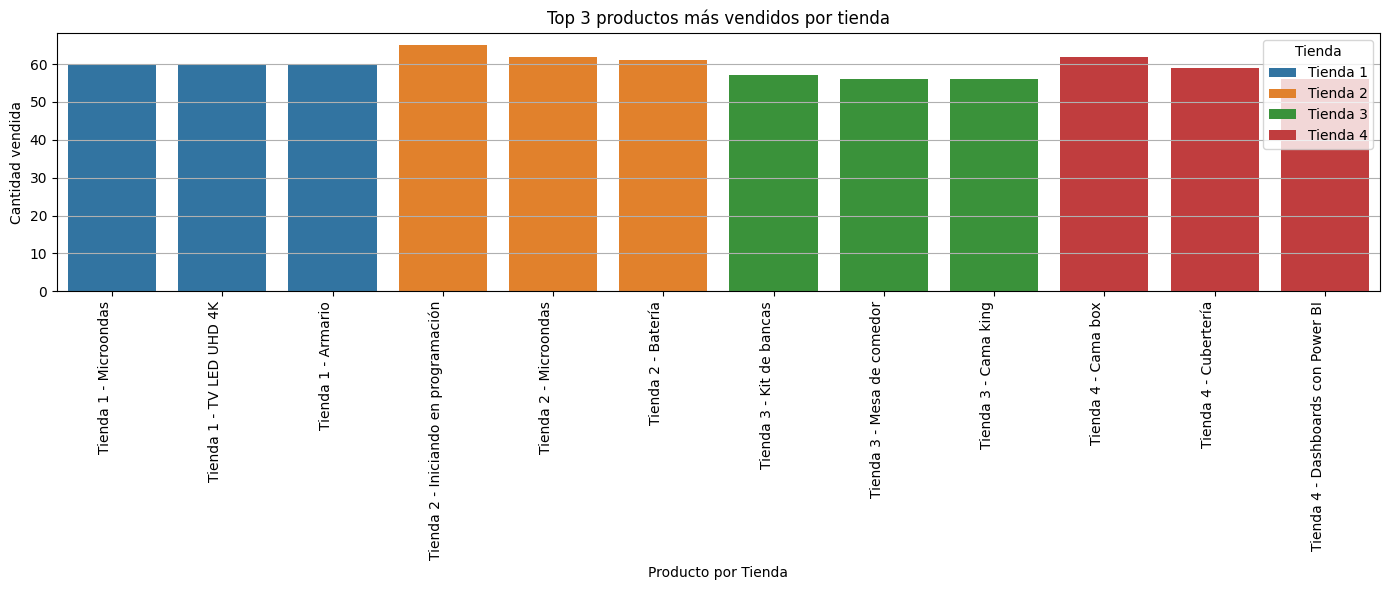

In [10]:
import seaborn as sns

data = []
for tienda, info in top3mas_vendidos.items():
    for producto, cantidad in info['mas vendidos']:
        data.append({
            'Tienda': tienda,
            'Producto': producto,
            'Cantidad vendida': cantidad
        })

df_top = pd.DataFrame(data)


df_top['Etiqueta'] = df_top['Tienda'] + ' - ' + df_top['Producto']

orden_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
df_top['Tienda'] = pd.Categorical(df_top['Tienda'], categories=orden_tiendas, ordered=True)

df_top = df_top.sort_values(['Tienda', 'Cantidad vendida'], ascending=[True, False])

plt.figure(figsize=(14, 6))
sns.barplot(data=df_top, x='Etiqueta', y='Cantidad vendida', hue='Tienda', dodge=False, palette='tab10')

plt.title('Top 3 productos más vendidos por tienda')
plt.xlabel('Producto por Tienda')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.grid(axis='y')

plt.show()

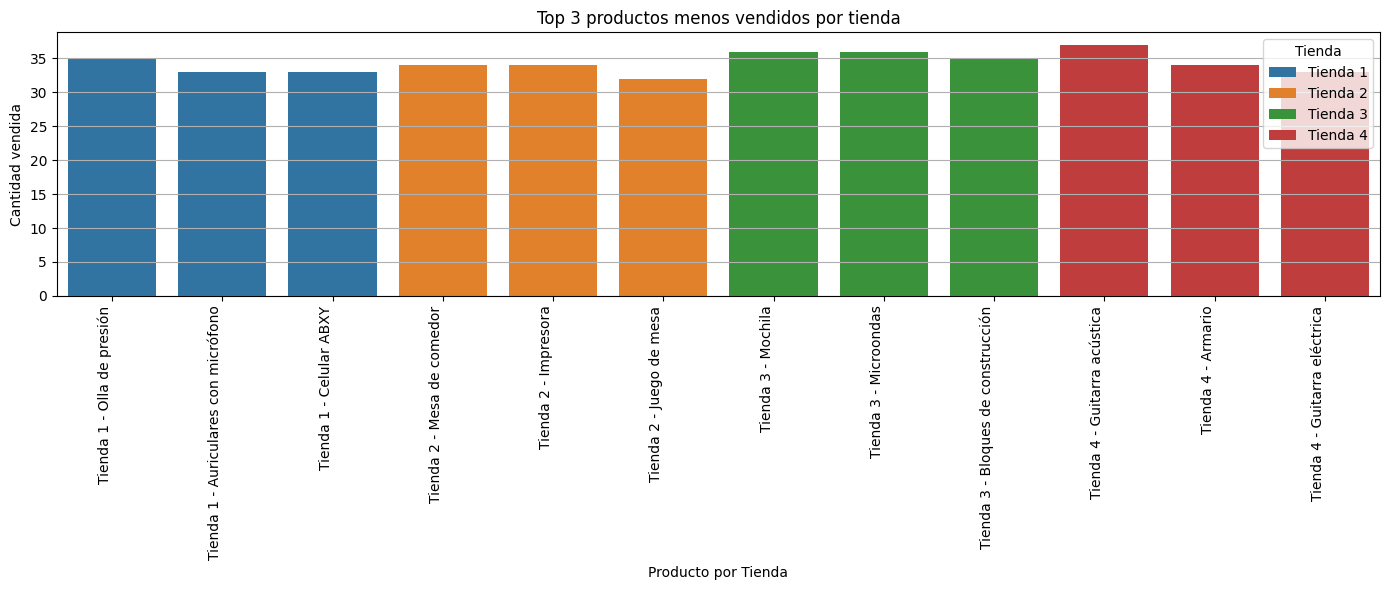

In [16]:
data2 = []
for tienda, info in top3menos_vendidos.items():
    for producto, cantidad in info['menos vendidos']:
        data2.append({
            'Tienda': tienda,
            'Producto': producto,
            'Cantidad vendida': cantidad
        })

df_2top = pd.DataFrame(data2)


df_2top['Etiqueta'] = df_2top['Tienda'] + ' - ' + df_2top['Producto']

orden_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
df_2top['Tienda'] = pd.Categorical(df_2top['Tienda'], categories=orden_tiendas, ordered=True)

df_2top = df_2top.sort_values(['Tienda', 'Cantidad vendida'], ascending=[True, False])

plt.figure(figsize=(14, 6))
sns.barplot(data=df_2top, x='Etiqueta', y='Cantidad vendida', hue='Tienda', dodge=False, palette='tab10')

plt.title('Top 3 productos menos vendidos por tienda')
plt.xlabel('Producto por Tienda')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Tienda')
plt.tight_layout()
plt.grid(axis='y')

plt.show()

# 5. Envío promedio por tienda

In [11]:
promedios_envios=[]
for i in range(len(tiendas)):
  envios_total = tiendas[i]['Costo de envío'].sum()
  total_envio=len(tiendas[i]['Costo de envío'])
  promedios_envios.append(float(envios_total/total_envio))


  print(f'El promedio de envio de la tienda {i+1} es: ${promedios_envios[i]:.2f}')



El promedio de envio de la tienda 1 es: $26018.61
El promedio de envio de la tienda 2 es: $25216.24
El promedio de envio de la tienda 3 es: $24805.68
El promedio de envio de la tienda 4 es: $23459.46


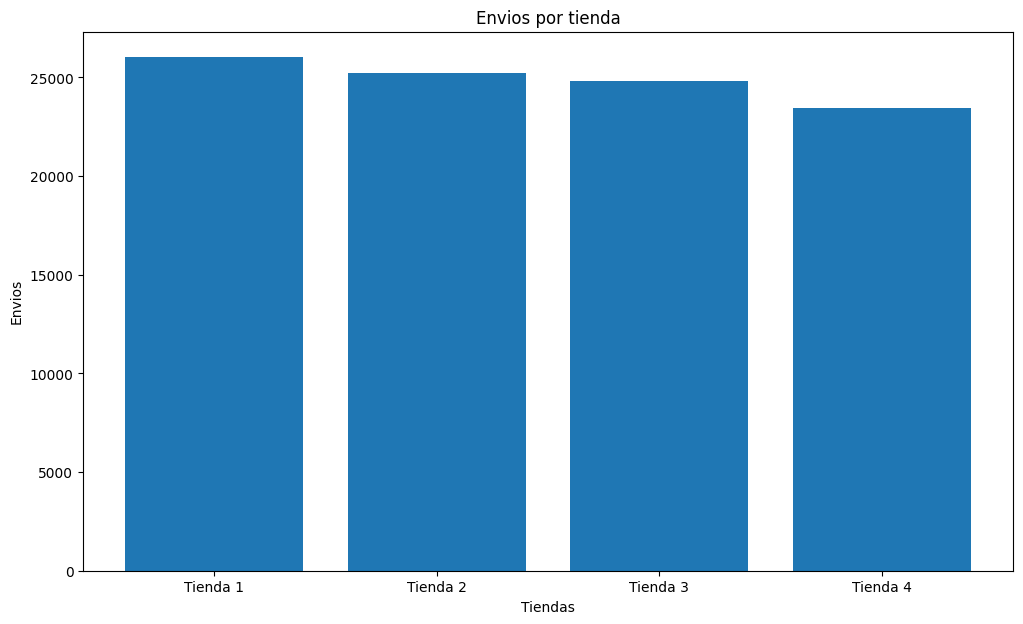

In [12]:
plt.figure(figsize=(12, 7))
plt.bar(texto_tiendas,promedios_envios)

plt.title('Envios por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Envios')


plt.show()